In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [12]:
books_df = pd.read_csv("../data/books.csv")
books_df.columns = books_df.columns.str.strip().str.lower()
books_df = books_df.fillna("")

In [14]:
books_df['combined_text'] = (
    books_df['title'].astype(str) + " " +
    books_df['author'].astype(str) + " " +
    books_df['genre'].astype(str) + " " +
    books_df['mood'].astype(str) + " " +
    books_df['description'].astype(str) + " " +
    books_df['review'].astype(str)
)


In [15]:
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(books_df['combined_text'])


In [16]:
os.makedirs("../models", exist_ok=True)
with open("../models/tfidf_model.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

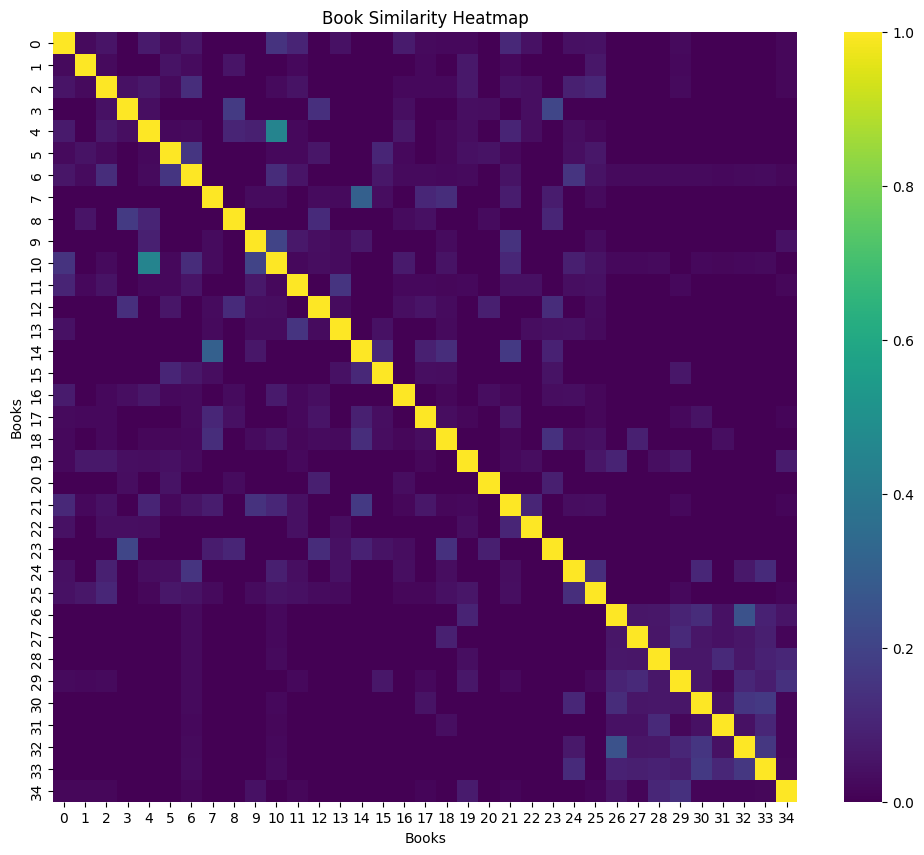

In [17]:
sim_matrix = cosine_similarity(tfidf_matrix)


plt.figure(figsize=(12,10))
sns.heatmap(sim_matrix, cmap='viridis')
plt.title("Book Similarity Heatmap")
plt.xlabel("Books")
plt.ylabel("Books")
plt.show()

In [19]:
print("TF-IDF model trained and saved at models/tfidf_model.pkl")

TF-IDF model trained and saved at models/tfidf_model.pkl
